<a href="https://colab.research.google.com/github/Inaracrewc/Birds/blob/main/Birds_Multi_class_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 24.0MB/s 
     |████████████████████████████████| 194kB 58.6MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.1MB 58.5MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = '/content/gdrive/MyDrive/BIRDS/'
base_dir = root_dir + 'train'

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/BIRDS/'

In [ ]:
import PIL
import torch
import pathlib
import numpy as np
from fastai import *
from fastai.vision.all import *
import pandas as pd
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install ipywidgets
from ipywidgets import *

In [ ]:
files = get_image_files('/content/gdrive/MyDrive/BIRDS/train')
len(files)

1345

In [ ]:
import os

d = '/content/gdrive/MyDrive/BIRDS/train'
[os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))]

['/content/gdrive/MyDrive/BIRDS/train/AMERICAN COOT',
 '/content/gdrive/MyDrive/BIRDS/train/AMERICAN AVOCET',
 '/content/gdrive/MyDrive/BIRDS/train/AFRICAN CROWNED CRANE',
 '/content/gdrive/MyDrive/BIRDS/train/AMERICAN GOLDFINCH',
 '/content/gdrive/MyDrive/BIRDS/train/AMERICAN KESTREL',
 '/content/gdrive/MyDrive/BIRDS/train/AMERICAN BITTERN',
 '/content/gdrive/MyDrive/BIRDS/train/ALBATROSS',
 '/content/gdrive/MyDrive/BIRDS/train/AFRICAN FIREFINCH',
 '/content/gdrive/MyDrive/BIRDS/train/ALEXANDRINE PARAKEET']

In [ ]:
train_data_dir = '/content/gdrive/MyDrive/BIRDS/train/'

In [ ]:
val_directory = '/content/gdrive/MyDrive/BIRDS/valid/'

In [ ]:
class_names = os.listdir(train_data_dir) # Get names of classes
class_name2id = { label: index for index, label in enumerate(class_names) }
print (class_name2id)

{'AMERICAN COOT': 0, 'AMERICAN AVOCET': 1, 'AFRICAN CROWNED CRANE': 2, 'AMERICAN GOLDFINCH': 3, 'AMERICAN KESTREL': 4, 'AMERICAN BITTERN': 5, 'ALBATROSS': 6, 'AFRICAN FIREFINCH': 7, 'ALEXANDRINE PARAKEET': 8}


In [ ]:
fnames = get_image_files(train_data_dir)

In [ ]:
fnames[0]

Path('/content/gdrive/MyDrive/BIRDS/train/AMERICAN COOT/086.jpg')

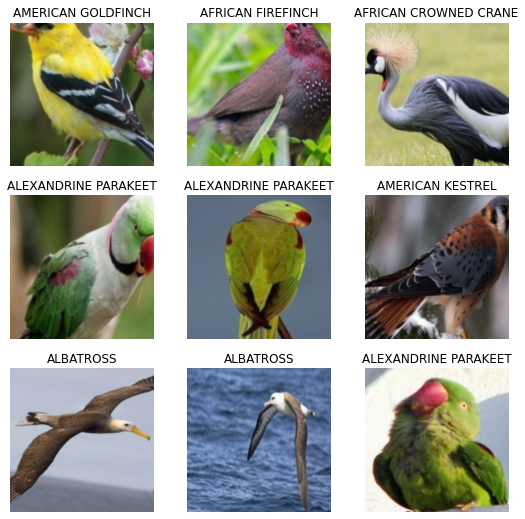

In [ ]:
dls = ImageDataLoaders.from_folder(path,
                 item_tfms=Resize(340),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=64)
dls.show_batch(nrows=3, ncols=3)

In [ ]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[aug_transforms(size=224, min_scale=0.75),
                   Normalize.from_stats(*imagenet_stats)]) # presizing, normalization
       

In [ ]:
dblock.summary(path)

In [ ]:
model = xresnet18(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.118315,2.084976,0.222222,03:26
1,1.724019,1.559586,0.377778,00:09
2,1.454430,1.402027,0.466667,00:09
3,1.258467,1.017743,0.644444,00:09
4,1.096299,0.853805,0.733333,00:09
5,0.975849,0.963216,0.711111,00:09
6,0.859337,0.578426,0.866667,00:09
7,0.747409,0.532221,0.844444,00:09
8,0.651719,0.490650,0.888889,00:09
9,0.584981,0.471774,0.866667,00:09


SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=1.3182567499825382e-06)

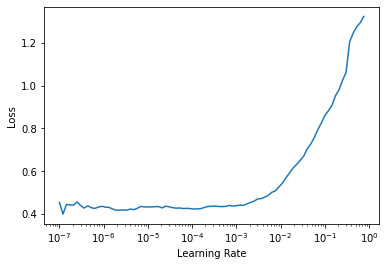

In [ ]:
learn.lr_find()

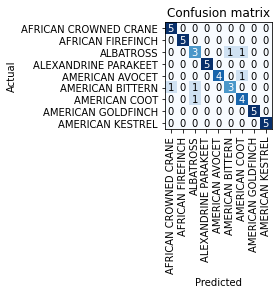

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

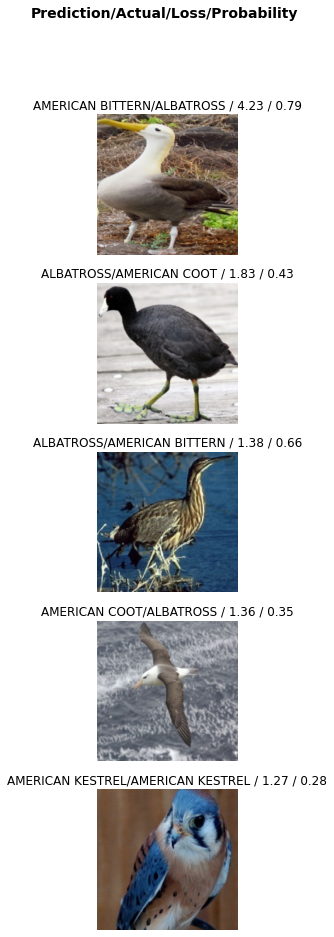

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
model = xresnet50(n_out=dls.c)  # Label Smoothing
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=accuracy)
learn.fit_one_cycle(30, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.678745,2.304686,0.288889,00:19
1,1.483885,1.518882,0.533333,00:19
2,1.368020,1.869049,0.466667,00:20
3,1.316711,1.667180,0.622222,00:19
4,1.294047,2.486806,0.555556,00:19
5,1.276400,2.233230,0.488889,00:19
6,1.256052,2.206145,0.488889,00:19
7,1.206899,0.994453,0.822222,00:19
8,1.126562,1.172585,0.733333,00:19
9,1.092016,1.261937,0.688889,00:19


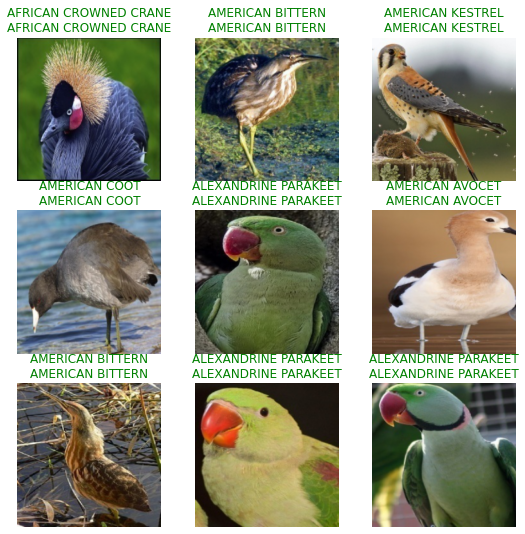

In [ ]:
learn.show_results()

In [ ]:
preds,targs = learn.tta()  #TTA test time augmentation 
accuracy(preds, targs).item()

In [ ]:
x,y = dls.one_batch() # Viewing Activations and Labels

In [ ]:
y

TensorCategory([8, 8, 4, 7, 4, 6, 7, 7, 1, 6, 8, 1, 6, 2, 8, 6, 0, 8, 6, 1, 5, 1, 3, 0, 0, 7, 6, 7, 6, 0, 1, 5, 3, 7, 6, 8, 7, 5, 7, 8, 6, 1, 3, 4, 6, 1, 4, 2, 5, 6, 0, 3, 4, 6, 0, 4, 3, 7, 0, 0, 3, 4, 6, 6],
       device='cuda:0')

In [ ]:
preds,targs = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([0.0614, 0.0631, 0.0036, 0.0184, 0.2408, 0.0163, 0.0025, 0.0080, 0.5860])

In [ ]:
len(preds[0]),preds[0].sum()

(9, tensor(1.0000))

In [ ]:
torch.random.manual_seed(40);

In [ ]:
acts = torch.randn((9,2))*2
acts

tensor([[ 2.4519,  2.7501],
        [ 0.3722, -3.7347],
        [-1.0242, -1.8567],
        [ 2.1550,  0.3186],
        [-3.7292,  1.0859],
        [-2.2991, -0.8903],
        [-0.7044,  1.8110],
        [-0.2495, -0.3877],
        [ 0.7732,  1.2417]])

In [ ]:
acts.sigmoid() # making positive between 0 ans 1

tensor([[0.9207, 0.9399],
        [0.5920, 0.0233],
        [0.2642, 0.1351],
        [0.8961, 0.5790],
        [0.0235, 0.7476],
        [0.0912, 0.2910],
        [0.3308, 0.8595],
        [0.4379, 0.4043],
        [0.6842, 0.7759]])

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.4260, 0.9838, 0.6969, 0.8625, 0.0080, 0.1964, 0.0748, 0.5345, 0.3850])

In [ ]:
sm_acts = torch.softmax(acts, dim=1)  # softmax function wants to pick one class among the others, so it's ideal for training a classifier when we know each picture has a definite label
sm_acts

tensor([[0.4260, 0.5740],
        [0.9838, 0.0162],
        [0.6969, 0.3031],
        [0.8625, 0.1375],
        [0.0080, 0.9920],
        [0.1964, 0.8036],
        [0.0748, 0.9252],
        [0.5345, 0.4655],
        [0.3850, 0.6150]])

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.930568,0.000041,1.000000,04:05
1,0.389353,0.000193,1.000000,00:09
2,0.219519,0.000386,1.000000,00:09



100% accuracy
```
epoch	train_loss	valid_loss	accuracy	time
0	1.052693	0.000410	1.000000	00:09
1	0.438339	0.000166	1.000000	00:09
2	0.240036	0.000227	1.000000	00:09
```



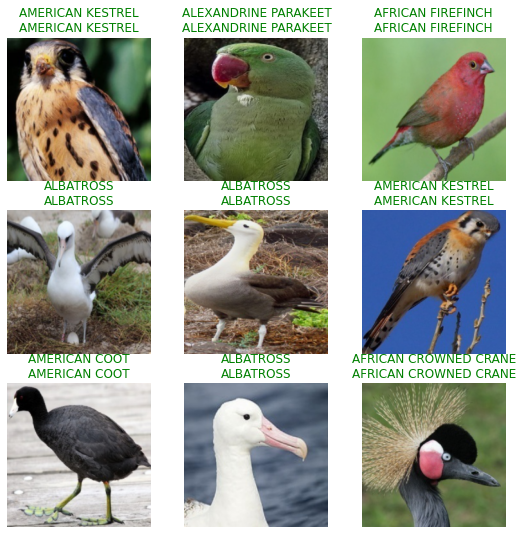

In [ ]:
learn.show_results()

In [ ]:
learn.path = Path("/content/gdrive/MyDrive/BIRDS")
learn.export('birds.pkl')

In [ ]:
learn_inf = load_learner("/content/gdrive/MyDrive/BIRDS/birds.pkl")

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/train/AFRICAN FIREFINCH/002.jpg')

('AFRICAN FIREFINCH',
 tensor(1),
 tensor([2.6585e-08, 9.9988e-01, 2.1928e-07, 1.1989e-04, 3.6829e-08, 7.9917e-08, 1.1857e-07, 2.6991e-06, 4.7405e-07]))

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/train/AMERICAN KESTREL/005.jpg')

('AMERICAN KESTREL',
 tensor(8),
 tensor([1.7045e-08, 5.0088e-06, 1.9164e-08, 1.7836e-07, 1.8459e-04, 4.1529e-06, 3.0616e-07, 8.2118e-07, 9.9980e-01]))

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/train/AMERICAN GOLDFINCH/006.jpg')

('AMERICAN GOLDFINCH',
 tensor(7),
 tensor([5.9723e-06, 1.6134e-06, 1.8241e-07, 1.1231e-04, 1.1385e-06, 1.2721e-06, 2.7484e-08, 9.9987e-01, 6.7684e-06]))

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/valid/ALEXANDRINE PARAKEET/2.jpg') # testing on validation set

('ALEXANDRINE PARAKEET',
 tensor(3),
 tensor([3.4014e-07, 1.9480e-06, 7.1784e-07, 1.0000e+00, 8.3375e-09, 5.7940e-09, 7.6133e-08, 9.3815e-07, 1.2658e-07]))

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/train/ALEXANDRINE PARAKEET/007.jpg') # testing on train set gives the same tensor value as for validation

('ALEXANDRINE PARAKEET',
 tensor(3),
 tensor([4.4810e-08, 9.7434e-06, 7.6499e-06, 9.9998e-01, 9.8801e-09, 1.4598e-08, 5.5598e-08, 1.7839e-07, 4.4513e-09]))

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/blue heron 018.jpg') # testing on img not being trained for

('AFRICAN CROWNED CRANE',
 tensor(0),
 tensor([9.5082e-01, 2.8290e-06, 7.1984e-06, 5.5365e-06, 7.8578e-04, 4.8351e-02, 6.9617e-06, 1.7318e-06, 1.9733e-05]))

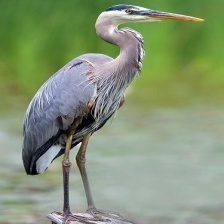

In [ ]:
img = PIL.Image.open(path/'gdrive/MyDrive/BIRDS/blue heron 018.jpg')
img

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/train/AFRICAN CROWNED CRANE/015.jpg')

('AFRICAN CROWNED CRANE',
 tensor(0),
 tensor([9.9992e-01, 2.7388e-08, 9.9390e-07, 7.5922e-07, 1.8810e-05, 2.5914e-05, 2.2943e-05, 3.3394e-07, 1.1999e-05]))

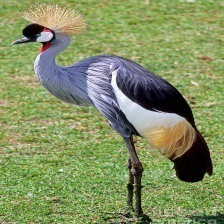

In [ ]:
img = PIL.Image.open(path/'gdrive/MyDrive/BIRDS/train/AFRICAN CROWNED CRANE/015.jpg')
img

In [ ]:
#For the bird which didnt participate in training, model gave prediction to the closest class, fue to softmax activations

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/BIRDS/common poorwill+firefinch.png')

('AMERICAN KESTREL',
 tensor(8),
 tensor([5.7567e-04, 1.5206e-02, 2.6891e-04, 1.0540e-02, 3.3090e-03, 5.5978e-04, 3.9887e-04, 5.0887e-03, 9.6405e-01]))

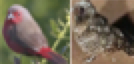

In [ ]:
img = PIL.Image.open(path/'gdrive/MyDrive/BIRDS/common poorwill+firefinch.png')
img

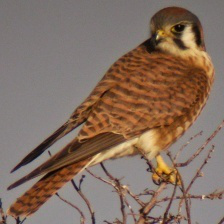

In [ ]:
img = PIL.Image.open(path/'gdrive/MyDrive/BIRDS/train/AMERICAN KESTREL/022.jpg')
img